In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('Superstore_Sales_Cleaned.csv')

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set the date as the index and resample monthly sales
monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()

# Print the first few rows to see the result
print(monthly_sales.head())

Order Date
2014-01-31    14236.895
2014-02-28     4519.892
2014-03-31    55691.009
2014-04-30    28295.345
2014-05-31    23648.287
Freq: ME, Name: Sales, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_14168\3327365101.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()


In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a DataFrame for the model
forecast_df = pd.DataFrame(monthly_sales)
forecast_df['month'] = np.arange(len(monthly_sales))

# Prepare the data for regression
X = forecast_df[['month']]
y = forecast_df['Sales']

# Initialize and train the model
model = LinearRegression()
model.fit(X, y)

# Create a future dataframe for forecasting (e.g., 6 months into the future)
future_months = np.arange(len(monthly_sales), len(monthly_sales) + 6).reshape(-1, 1)
forecasted_sales = model.predict(future_months)

# Print the forecasted sales
print("\nForecasted Sales for the next 6 months:")
for i, forecast in enumerate(forecasted_sales):
    print(f"Month {i+1}: ${forecast:,.2f}")


Forecasted Sales for the next 6 months:
Month 1: $69,957.54
Month 2: $70,859.54
Month 3: $71,761.55
Month 4: $72,663.56
Month 5: $73,565.57
Month 6: $74,467.57


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\pc\AppData\Local\Temp\ipykernel_14168\3959889720.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=monthly_sales.index[-1], periods=7, freq='M')[1:]


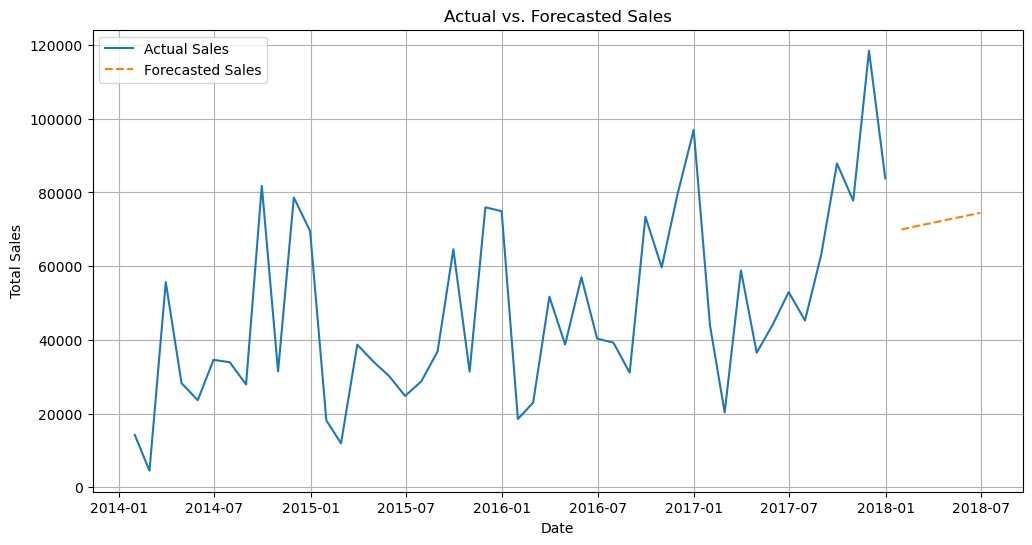

In [3]:
# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Actual Sales')

# Create a time index for the forecasted data
future_index = pd.date_range(start=monthly_sales.index[-1], periods=7, freq='M')[1:]
plt.plot(future_index, forecasted_sales, label='Forecasted Sales', linestyle='--')

plt.title('Actual vs. Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()